In [43]:
#Convolution
from PIL import Image, ImageDraw
import numpy as np
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from skimage.filters import threshold_otsu
from skimage import data, exposure, img_as_float
# Load image:
input_image = Image.open("dtest1.jpg")
input_pixels = input_image.load()
width, height = input_image.width, input_image.height

# Create output image
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

# Convert to grayscale
intensity = np.zeros((width, height))
for x in range(width):
    for y in range(height):
        intensity[x, y] = sum(input_pixels[x, y]) / 3
index=0
# Compute convolution between intensity and kernels
for x in range(1, input_image.width - 1):
    for y in range(1, input_image.height - 1):
        magx = intensity[x + 1, y] - intensity[x - 1, y]
        magy = intensity[x, y + 1] - intensity[x, y - 1]

        # Draw in black and white the magnitude
        color = int(sqrt(magx**2 + magy**2))
        draw.point((x, y), (color, color, color))
    index = index + 1
            #print str(index) + " : " + str(r) + ", (x,y) = " + str(x) + ', ' + str(y)
output_image.save('edge.jpg')

interactive(children=(IntSlider(value=70, description='max_sigma', min=10, step=2), FloatSlider(value=0.1, des…

In [4]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import blob_doh
from skimage.color import rgb2gray
from ipywidgets import interact, fixed
from skimage.util import img_as_ubyte

image = img_as_ubyte(plt.imread('blackdomino.png'))
image_gray = rgb2gray(image)

def plot_blobs(max_sigma=70, threshold=0.1, gray=True):
    """
    Plot the image and the blobs that have been found.
    """
    blobs = blob_doh(image_gray, max_sigma=max_sigma, threshold=threshold)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Domino Dot Counter')
    
    if gray:
        ax.imshow(image_gray, interpolation='nearest', cmap='gray_r')
        circle_color = 'red'
    else:
        ax.imshow(image, interpolation='nearest')
        circle_color = 'yellow'
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=circle_color, linewidth=2, fill=False)
        ax.add_patch(c)
        plt.annotate('Dots counted = %s' % len(blobs), xy=(120, 120), fontsize=20, color='white')
interact(plot_blobs, max_sigma=(10, 100, 2), threshold=(0.005, 0.5, 0.001));

interactive(children=(IntSlider(value=70, description='max_sigma', min=10, step=2), FloatSlider(value=0.1, des…

In [5]:
import sys
import cv2
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
from matplotlib import pyplot as plt


import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

img = cv2.imread('blackdomino.png',0)

# cleaned_img = img

def plot_edge(lower=1,upper=750): 

    # cv2.canny(image, lower, upper)
    # lower  and upper  are our integer thresholds boundary on the gradient values.
    edges = cv2.Canny(img,lower,upper)
    
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    # this way (global) it passes to the next blob_doh functions
    global cleaned_img
    cleaned_img = cv2.Canny(img,lower,upper)

interact(plot_edge, 
         lower=(1, 300, 1), 
         upper=(1, 1000, 1), 
            ); 

interactive(children=(IntSlider(value=1, description='lower', max=300, min=1), IntSlider(value=750, descriptio…

We can do something with the above right image i don't know what

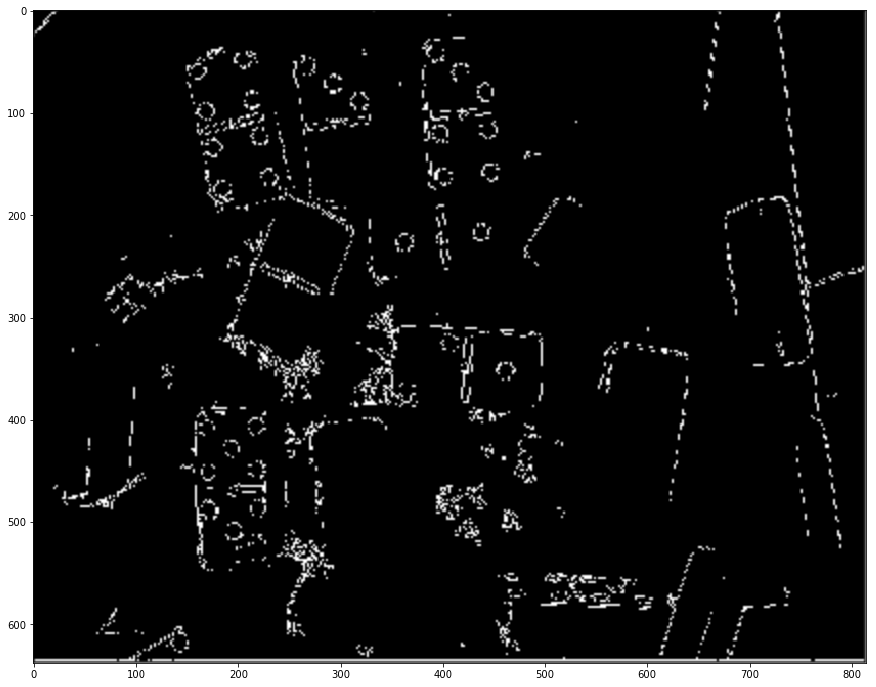

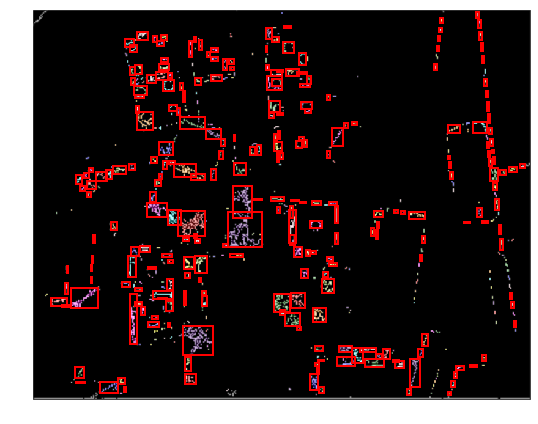

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import io
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
im = io.imread('maybe.png',as_gray=True);
plt.imshow(im,cmap='gray');
thresh = threshold_otsu(im)
bw = closing(im > thresh, square(3))
cleared = clear_border(bw)
label_image = label(cleared)

image_label_overlay = label2rgb(label_image, image=im, bg_label=0)
ig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 20:
        # draw rectangle around segmented dots
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Image props does not work. try something else

In [6]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
from ipywidgets import interact, fixed


# instead of opening an image from a file, here it takes the output from the previous edge detection

im = cleaned_img 

def plot_blobs(
               min_sigma=1, 
               max_sigma=30, 
               num_sigma=2, 
               threshold=0.01, 
               overlap=0.5, 
               log_scale=False
                ):
    """
    Plot the image and the blobs that have been found.
    """
#blobs = blob_doh(im, max_sigma=max_sigma, threshold=threshold)
    blobs = blob_doh(im, 
                     min_sigma=min_sigma, 
                     max_sigma=max_sigma, 
                     num_sigma=num_sigma, 
                     threshold=threshold, 
                     overlap=overlap, 
                     log_scale=log_scale
                            )
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_title('Count Cells')
    
    plt.annotate('Cells counted = %s' % len(blobs), xy=(100, 100), fontsize=20, color='white')
    ax.imshow(im, interpolation='nearest')

    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False, label='sine')
        ax.add_patch(c)

        
interact(plot_blobs, 
         min_sigma=(1, 100, 2), # Keep this low to detect smaller blobs. The minimum standard deviation for Gaussian Kernel used to compute Hessian matrix. 
         max_sigma=(1, 100, 2), # Keep this high to detect larger blobs.
         num_sigma=(1, 10, 1), # The number of intermediate values of standard deviations to consider between min_sigma and max_sigma.
         threshold=(0.001, 0.02, 0.001), # Reduce this to detect less prominent blobs. The absolute lower bound for scale space maxima. Local maxima smaller than thresh are ignored. 
         overlap=(0.001, 1, 0.001), # A value between 0 and 1. If the area of two blobs overlaps by a fraction greater than threshold, the smaller blob is eliminated.
         log_scale=False  # If set intermediate values of standard deviations are interpolated using a logarithmic scale to the base 10. If not, linear interpolation is used.
            ); 

interactive(children=(IntSlider(value=1, description='min_sigma', min=1, step=2), IntSlider(value=30, descript…